In [1]:
###Author Sobha B####
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
dftr=pd.read_csv('ALS_TrainingData_2223.csv')
dftr

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


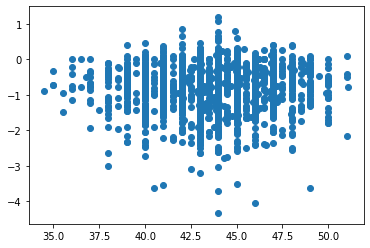

In [3]:
plt.scatter(dftr.Albumin_median,dftr.ALSFRS_slope)

SELECT THE FEATURES

In [4]:
import numpy as np
print('Correlation:\n',dftr.corr(method='pearson'))

Correlation:
                        ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  \
ID               1.000000  0.007008    -0.014141       -0.011243    -0.009921   
Age_mean         0.007008  1.000000    -0.276195       -0.349024    -0.297121   
Albumin_max     -0.014141 -0.276195     1.000000        0.780141     0.596662   
Albumin_median  -0.011243 -0.349024     0.780141        1.000000     0.761269   
Albumin_min     -0.009921 -0.297121     0.596662        0.761269     1.000000   
...                   ...       ...          ...             ...          ...   
trunk_min        0.015915  0.065092     0.042903        0.072317     0.134409   
trunk_range     -0.000649  0.036559    -0.064183       -0.088370    -0.114685   
Urine.Ph_max    -0.022561 -0.001532     0.075413        0.056894     0.034555   
Urine.Ph_median -0.016045  0.002561    -0.046885       -0.042497    -0.001877   
Urine.Ph_min     0.002042 -0.008615    -0.138430       -0.118506    -0.049783   

             

In [5]:
import seaborn as sns
corln=dftr.corr(method='pearson')
plt.figure(figsize=(10,5))
#sns.heatmap(corln,cmap='Blues',annot=True)
print('\nCorrelation of "ALSFRS_slope" with other Parameters in descending order\n\n',corln.ALSFRS_slope.sort_values(ascending=False))


Correlation of "ALSFRS_slope" with other Parameters in descending order

 ALSFRS_slope          1.000000
ALSFRS_Total_min      0.601810
trunk_min             0.488530
mouth_min             0.435538
hands_min             0.424107
                        ...   
mouth_range          -0.553194
leg_range            -0.584507
hands_range          -0.632350
trunk_range          -0.686407
ALSFRS_Total_range   -0.819305
Name: ALSFRS_slope, Length: 101, dtype: float64


<Figure size 720x360 with 0 Axes>

In [6]:
xy=dftr.iloc[:,[3,6]]
xy

,Albumin_median,ALSFRS_slope
0,40.5,-0.965608
1,41.0,-0.921717
2,47.0,-0.914787
3,44.0,-0.598361
4,45.5,-0.444039
...,...,...
2218,49.0,-0.239501
2219,45.0,-0.388711
2220,44.0,-0.108631
2221,44.0,-0.855880


In [7]:
k=KMeans(4) #or k=KMeans(n_clusters=4)

In [8]:
k.fit(xy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
clusterclass=k.fit_predict(xy)
clusterclass

array([2, 2, 1, ..., 0, 0, 3])

In [10]:
dftr['cluster']=clusterclass
dftr

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,cluster
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0,2
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0,2
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0,1
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0,0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0,1
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0,3
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0,0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0,0


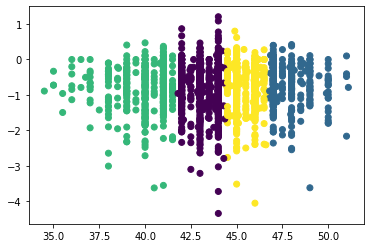

In [11]:
plt.scatter(dftr.Albumin_median, dftr.ALSFRS_slope,c=dftr.cluster)#,cmap='rainbow')
#here c is color as many as in cluster group
#cmap is colormap

In [12]:
k.inertia_

2645.531853713219

In [13]:
wcss=[] #witnin cluster sum of squares
k_range=range(1,10)
for i in k_range: #for k in range(1,10)
    k=KMeans(i)
    k.fit(xy)
    wcss_iter=k.inertia_
    wcss.append(wcss_iter)
wcss

[16521.185020848203,
 6696.570906613342,
 3612.985845928442,
 2644.6084170994072,
 2017.3944653367275,
 1657.1022780057733,
 1453.8893922997686,
 1259.2872647024183,
 1135.1145236931154]

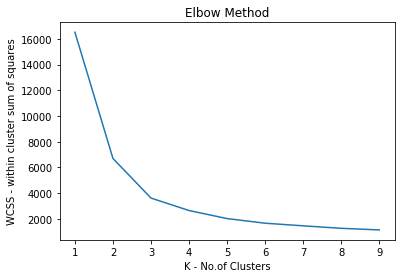

In [14]:
plt.title('Elbow Method') #to find the optimum K value
plt.xlabel('K - No.of Clusters')
plt.ylabel('WCSS - within cluster sum of squares')
plt.plot(k_range,wcss)

standardisation

In [15]:
from sklearn import preprocessing
scaled=preprocessing.scale(xy)
scaled


array([[-1.30078105, -0.38145034],
       [-1.11240084, -0.31090704],
       [ 1.14816173, -0.29976862],
       ...,
       [ 0.01788044,  0.99590769],
       [ 0.01788044, -0.20509208],
       [ 0.39464087, -2.12521742]])

In [16]:
wcss=[]
for i in range(1,10):
    k=KMeans(i)
    k.fit(scaled)
    wcss_iter=k.inertia_
    wcss.append(wcss_iter)
wcss

[4446.000000000001,
 2925.567622540491,
 1956.2976598677408,
 1556.5670778104304,
 1275.0364846128596,
 1081.0204479766744,
 929.9569957244969,
 837.8178410207863,
 758.8828649053812]

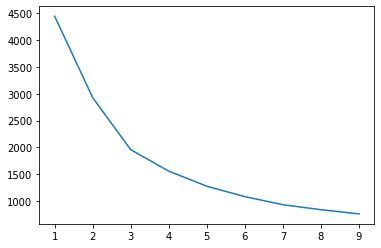

In [17]:
plt.plot(k_range,wcss)

In [18]:
k_scaled=KMeans(4)
k_scaled.fit(scaled)
cluster=k_scaled.fit_predict(scaled)
cluster
dftr['scaled_cluster']=cluster
dftr

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,cluster,scaled_cluster
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,533,8,7.0,7,0.002646,6.00,6.0,6.0,2,3
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,649,8,7.0,5,0.005386,7.00,5.0,5.0,2,3
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,1234,5,0.0,0,0.008929,6.00,5.0,5.0,1,2
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,2492,5,5.0,3,0.004988,7.00,6.0,5.0,0,1
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,2956,6,4.0,1,0.008489,6.00,5.0,5.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,997136,7,5.0,5,0.003643,7.00,6.0,5.0,1,2
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,998047,5,4.0,3,0.003630,7.41,5.5,5.0,3,1
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,998773,5,4.0,4,0.001825,9.00,6.0,5.0,0,1
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,998908,8,4.5,2,0.010714,6.00,5.0,5.0,0,1


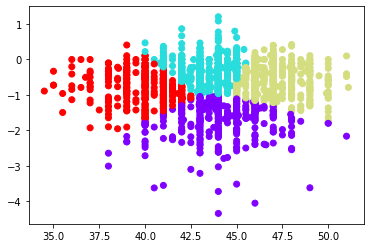

In [19]:
plt.scatter(dftr.Albumin_median, dftr.ALSFRS_slope,c=dftr.scaled_cluster,cmap='rainbow')

In [20]:
k_scaled.cluster_centers_

array([[ 0.0513285 , -1.52922751],
       [-0.15018244,  0.6022053 ],
       [ 1.08970309,  0.26791578],
       [-1.48268722, -0.11288081]])

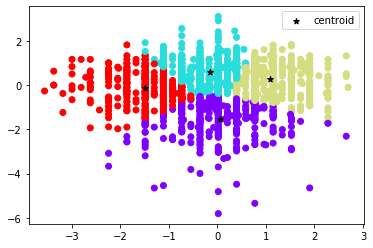

In [21]:
plt.scatter(scaled[:,0], scaled[:,1],c=dftr.scaled_cluster,cmap='rainbow')
plt.scatter(k_scaled.cluster_centers_[:,0],k_scaled.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()